In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Predict_Rain.csv")
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [2]:
data = data.dropna()

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [4]:
x = data[["MinTemp", "Rainfall","Evaporation", "Sunshine", "WindSpeed9am", "Humidity9am", "Pressure9am", "Cloud9am"]]
y = data["RainTomorrow"]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier()
model_gini.fit(x_train,y_train)
pred_cart = model_gini.predict(x_test)

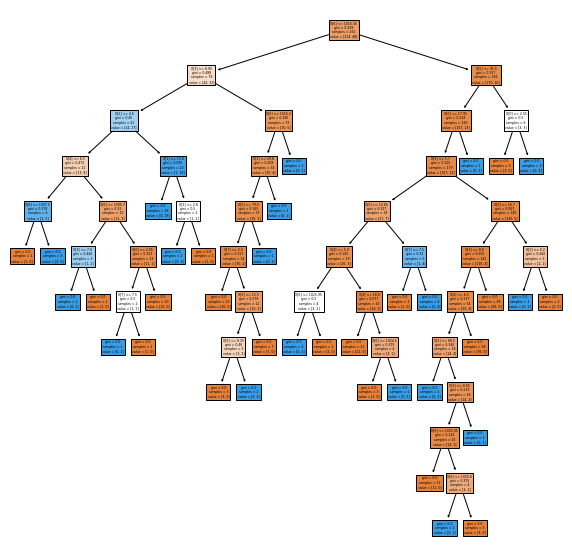

In [7]:
from sklearn import tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model_gini, filled=True)
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, pred_cart, labels=[1, 0])
print(conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print(f"True Positive: {TP}")
print(f"True Negative: {TN}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")


[[ 4  8]
 [ 9 45]]
True Positive: 4
True Negative: 45
False Positive: 9
False Negative: 8


In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(y_test, pred_cart):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(y_test, pred_cart):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(y_test, pred_cart):.3}")
print(
    f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, pred_cart):.3}")


Recall Score: 0.333
Specitivity Score: 0.833
Precision Score: 0.308
Negative Prediction Value: 0.849
F1 Score: 0.32
Matthews Correlation Coefficient: 0.162


In [10]:
from sklearn.tree import DecisionTreeClassifier
model_id3 = DecisionTreeClassifier(criterion="entropy")
model_id3.fit(x_train, y_train)
pred_id3 = model_id3.predict(x_test)


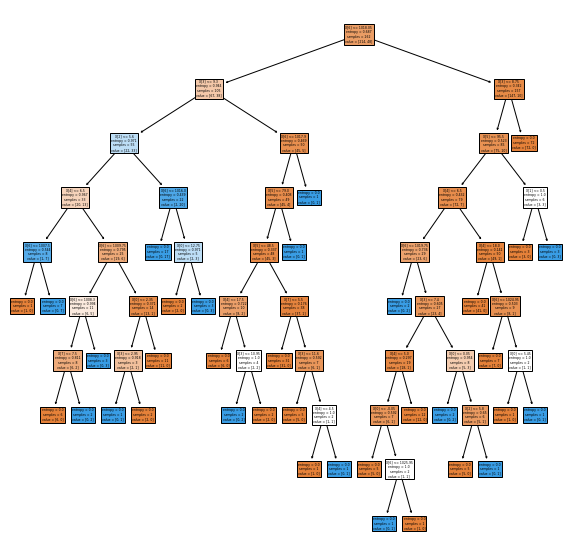

In [11]:
from sklearn import tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model_id3, filled=True)
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, pred_id3, labels=[1, 0])
print(conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print(f"True Positive: {TP}")
print(f"True Negative: {TN}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")

[[ 5  7]
 [16 38]]
True Positive: 5
True Negative: 38
False Positive: 16
False Negative: 7


In [13]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(y_test, pred_cart):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(y_test, pred_cart):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(y_test, pred_cart):.3}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, pred_cart):.3}")

Recall Score: 0.333
Specitivity Score: 0.704
Precision Score: 0.308
Negative Prediction Value: 0.844
F1 Score: 0.32
Matthews Correlation Coefficient: 0.162
